In [24]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [25]:
all_df = pd.read_csv("data.csv")

In [26]:
all_df['class']= all_df['class'].map({'RB':0, 'NRB': 1}).astype(int)

In [27]:
all_df.shape

(1055, 42)

In [28]:
X=all_df.drop(['class'], axis=1).values.astype('float64')

In [29]:
Y = all_df['class'].values.astype('int64')

In [30]:
X.shape

(1055, 41)

In [31]:
 X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

844

In [32]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [33]:
model = Sequential()

In [34]:
model.add(Dense(units=82*4,   input_dim=41,
                kernel_initializer='uniform', 
                activation='relu'))

In [35]:
model.add(Dense(units=82*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [36]:
model.add(Dense(units=82*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [37]:
model.add(Dense(units=82, 
                kernel_initializer='uniform', 
                activation='relu'))

In [38]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 328)               13776     
_________________________________________________________________
dense_7 (Dense)              (None, 246)               80934     
_________________________________________________________________
dense_8 (Dense)              (None, 164)               40508     
_________________________________________________________________
dense_9 (Dense)              (None, 82)                13530     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 83        
Total params: 148,831
Trainable params: 148,831
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [41]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=60,verbose=1,callbacks=[early_stopping])

Train on 759 samples, validate on 85 samples
Epoch 1/30
759/759 [==============================] - 1s 1ms/step - loss: 0.6646 - acc: 0.6548 - val_loss: 0.5142 - val_acc: 0.7059
Epoch 2/30
759/759 [==============================] - 0s 196us/step - loss: 0.4814 - acc: 0.7655 - val_loss: 0.3210 - val_acc: 0.8588
Epoch 3/30
759/759 [==============================] - 0s 199us/step - loss: 0.3901 - acc: 0.8735 - val_loss: 0.2624 - val_acc: 0.8941
Epoch 4/30
759/759 [==============================] - 0s 169us/step - loss: 0.3234 - acc: 0.8788 - val_loss: 0.2576 - val_acc: 0.8824
Epoch 5/30
759/759 [==============================] - 0s 175us/step - loss: 0.2939 - acc: 0.8880 - val_loss: 0.2297 - val_acc: 0.9176
Epoch 6/30
759/759 [==============================] - 0s 305us/step - loss: 0.2709 - acc: 0.8906 - val_loss: 0.2308 - val_acc: 0.9176
Epoch 7/30
759/759 [==============================] - 0s 183us/step - loss: 0.2584 - acc: 0.8986 - val_loss: 0.2310 - val_acc: 0.9176


In [42]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

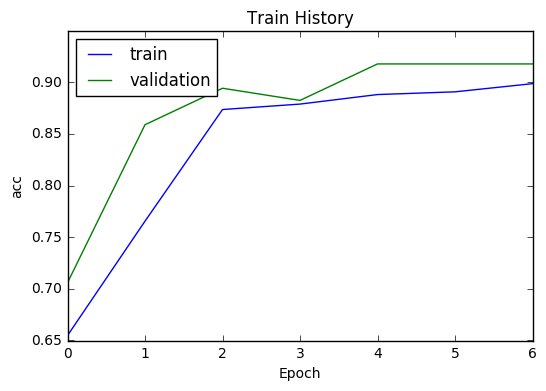

In [43]:
show_train_history(train_history,'acc','val_acc')

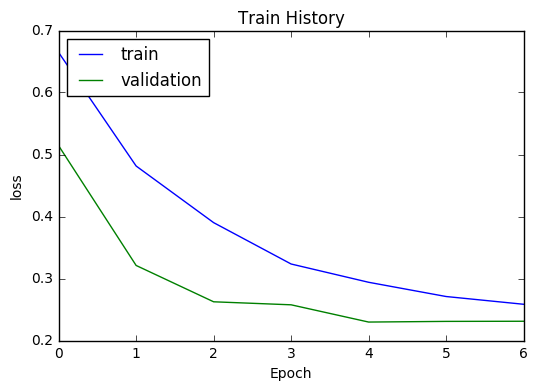

In [44]:
show_train_history(train_history,'loss','val_loss')

In [45]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

211/211 [==============================] - 0s 298us/step


In [46]:
scores[1]

0.8578199038008378